In [1]:
import sys
sys.path.insert(0, '/home/users/mmuetz/deploy/wcrp_hackathon/scripts/convert_latlon_pp_to_hp_nc')
from processing_config import processing_config

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import easygems.healpix as egh

In [3]:
regional = [k for k in processing_config if 'km4p4' in k]
print(regional)

['SAmer_km4p4_RAL3P3.n1280_GAL9_nest', 'Africa_km4p4_RAL3P3.n1280_GAL9_nest', 'SEA_km4p4_RAL3P3.n1280_GAL9_nest', 'SAmer_km4p4_CoMA9_TBv1.n1280_GAL9_nest', 'Africa_km4p4_CoMA9_TBv1.n1280_GAL9_nest', 'SEA_km4p4_CoMA9_TBv1.n1280_GAL9_nest', 'CTC_km4p4_RAL3P3.n1280_GAL9_nest', 'CTC_km4p4_CoMA9_TBv1.n1280_GAL9_nest']


In [4]:
dss = {}
for reg in sorted(regional):
    try:
        url = f'https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/dev/{reg}/data.healpix.2d.v1.z10.zarr'
        ds = xr.open_zarr(url)
        dss[reg] = ds
        print(f'loaded {reg}')
    except Exception as e:
        print(f'Could not load {reg}')
        print(e)
# ds = xr.open_zarr('https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/Africa_km4p4_RAL3P3.n1280_GAL9_nest/dev/data.healpix.2d.v1.z10.zarr')
# ds = xr.open_zarr('https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/10km_GAL9_nest/dev/data.healpix.2d.v1.z10.zarr')

loaded Africa_km4p4_CoMA9_TBv1.n1280_GAL9_nest
loaded Africa_km4p4_RAL3P3.n1280_GAL9_nest
loaded CTC_km4p4_CoMA9_TBv1.n1280_GAL9_nest
loaded CTC_km4p4_RAL3P3.n1280_GAL9_nest
loaded SAmer_km4p4_CoMA9_TBv1.n1280_GAL9_nest
loaded SAmer_km4p4_RAL3P3.n1280_GAL9_nest
loaded SEA_km4p4_CoMA9_TBv1.n1280_GAL9_nest
loaded SEA_km4p4_RAL3P3.n1280_GAL9_nest


In [5]:
ds

<xarray.Dataset> Size: 4TB
Dimensions:  (cell: 4194304, time: 10489)
Coordinates:
  * cell     (cell) int64 34MB 1048576 1048577 1048578 ... 10485758 10485759
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/24)
    clivi    (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clt      (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clwvi    (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hflsd    (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hfssd    (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    huss     (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ...       ...
    rsut     (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    rsutcs   (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    tas      (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ts       (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    uas      (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    vas      (time, cell) float32 176GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>

In [6]:
# ds = ds.assign_coords(crs=crs)

Africa_km4p4_CoMA9_TBv1.n1280_GAL9_nest
Africa_km4p4_RAL3P3.n1280_GAL9_nest
CTC_km4p4_CoMA9_TBv1.n1280_GAL9_nest
CTC_km4p4_RAL3P3.n1280_GAL9_nest
SAmer_km4p4_CoMA9_TBv1.n1280_GAL9_nest
SAmer_km4p4_RAL3P3.n1280_GAL9_nest
SEA_km4p4_CoMA9_TBv1.n1280_GAL9_nest
SEA_km4p4_RAL3P3.n1280_GAL9_nest


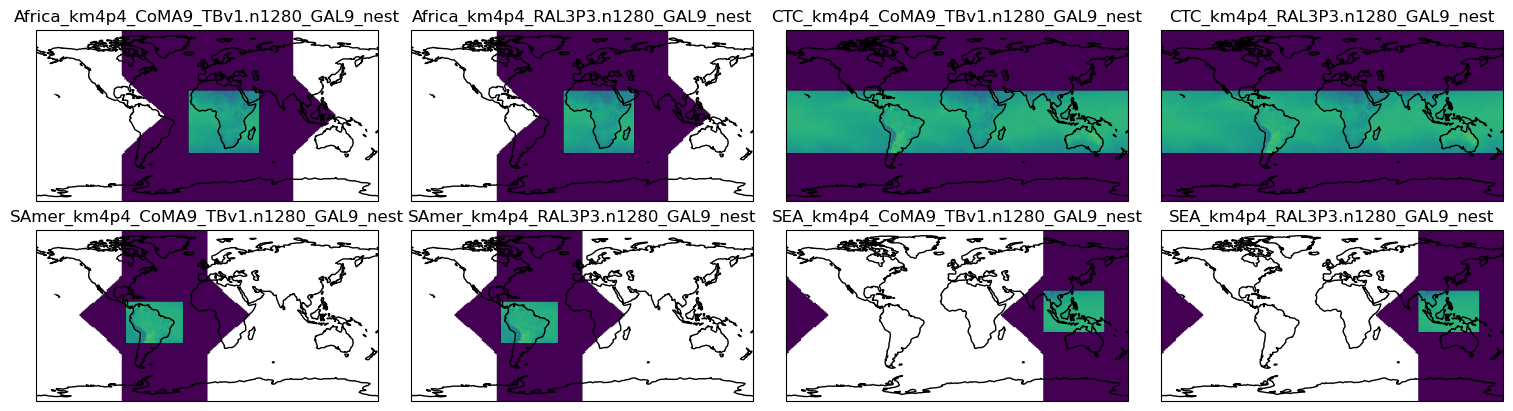

In [7]:
projection = ccrs.Robinson(central_longitude=0)
projection = ccrs.PlateCarree()

fig, axes = plt.subplots(2, 4, figsize=(15, 4), subplot_kw={'projection': projection}, layout='constrained')
for ax, (name, ds) in zip(axes.flatten(), dss.items()):
    print(name)
    ds_ones = xr.Dataset({'ones': (['cell'], np.ones_like(ds.isel(time=0).tas))}, coords={'cell': ds.cell}).assign_coords(crs=ds.crs)
    ax.set_title(name)
    ax.set_global()
    egh.healpix_show(ds_ones.ones, ax=ax)
    egh.healpix_show(ds.isel(time=0).tas, ax=ax, vmin=250, vmax=330)
    ax.coastlines()

In [8]:
# v2 data.
reg = 'Africa_km4p4_RAL3P3.n1280_GAL9_nest'
url = f'https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/dev/{reg}/data.healpix.2d.v2.z10.zarr'
ds = xr.open_zarr(url)


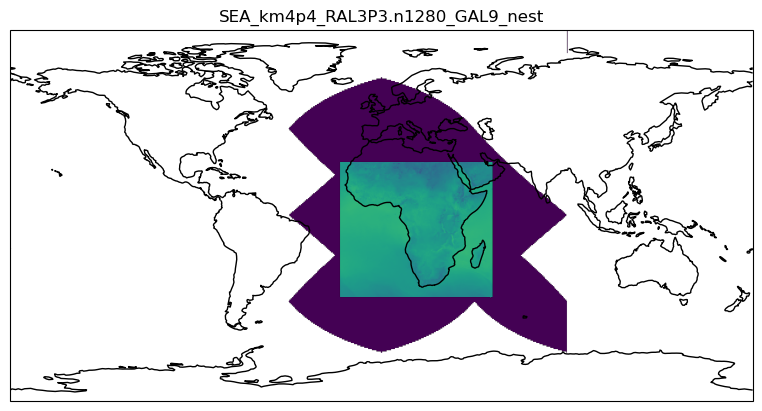

In [9]:
projection = ccrs.Robinson(central_longitude=0)
projection = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(15, 4), subplot_kw={'projection': projection}, layout='constrained')
ds_ones = xr.Dataset({'ones': (['cell'], np.ones_like(ds.isel(time=0).tas))}, coords={'cell': ds.cell}).assign_coords(crs=ds.crs)
ax.set_title(name)
ax.set_global()
egh.healpix_show(ds_ones.ones, ax=ax)
egh.healpix_show(ds.isel(time=0).tas, ax=ax, vmin=250, vmax=330)
ax.coastlines()

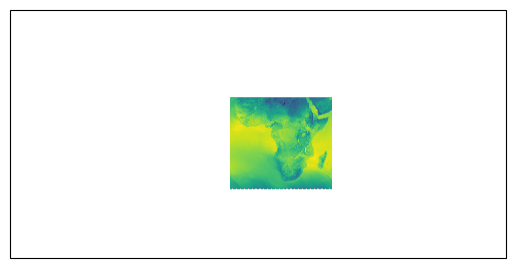

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection': projection})
ax.set_global()
egh.healpix_show(dss['Africa_km4p4_RAL3P3.n1280_GAL9_nest'].isel(time=0).tas, ax=ax);

In [9]:
import sys
sys.path.insert(0, '/home/users/mmuetz/deploy/wcrp_hackathon/scripts/convert_latlon_pp_to_hp_nc')
sys.path.insert(0, '/home/users/mmuetz/deploy/global_hackathon_tools/dataset_transforms')

In [10]:
import um_latlon_pp_to_healpix_nc as umh

In [11]:
import iris
import xarray

In [12]:
#path = '/gws/nopw/j04/kscale/DYAMOND3_example_data/sample_data_hirerarchy/10km-GAL9-nest/SAmer_km4p4_RAL3P3/field.pp/apvera.pp/SAmer_km4p4_RAL3P3.n1280_GAL9_nest.apvera_20200120T00.pp'
#cube = iris.load(path).extract_cube('air_temperature')

In [13]:
hp_lon, hp_lat, ichunk = umh.get_limited_healpix(extent, 10, 4**10)

NameError: name 'extent' is not defined

In [ ]:
hp_lon

In [ ]:
import numpy as np
da = xr.DataArray(np.ones(len(ichunk)), coords={'cell': ichunk})

In [ ]:
egh.healpix_show(da)

In [ ]:
psl = ds.isel(time=0).psl

In [ ]:
psl

In [ ]:
da

In [29]:
round(53.959991455078125, 4)

53.96